### Topic Modeling Assessment 

Working with a dataset of  quora questions that have no labeled cateogry and attempt to find representtaive topics for the questions. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
import re
import string 
!pip install more-itertools
import itertools
import collections

In [ ]:
train_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/NLP/CW1/quora_questions.csv")
print(train_data.info())
print(train_data.describe())
text_train = train_data['Question']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404289 entries, 0 to 404288
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Question  404289 non-null  object
dtypes: object(1)
memory usage: 3.1+ MB
None
                                     Question
count                                  404289
unique                                 290456
top     How do I improve my English speaking?
freq                                       50


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
## Remove pactuations from the tweet words
text_train = text_train.str.replace('[{}]'.format(string.punctuation),'')

## Remove digits
text_train = text_train.str.replace('[0-9]+','')

## Lower case & Word Tokenizer
import nltk
nltk.download('punkt')
from nltk import word_tokenize
text_train = text_train.apply(lambda row: word_tokenize(row.lower()))

##Stemming
from nltk.stem.porter import PorterStemmer 
def stemming(data):
  out_sentence = [PorterStemmer().stem(token) for token in data]
  return out_sentence
text_train = text_train.apply(lambda row: stemming(row))

##lemmatizer
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def lemmatizer(data):
  lemmatizer = WordNetLemmatizer()  
  out_sentence = [lemmatizer.lemmatize(token) for token in data]
  return(out_sentence)
text_train = text_train.apply(lambda row: lemmatizer(row))

## Remove Stop Words
nltk.download('stopwords')
from nltk.corpus import stopwords as nltk_stopwords
def stopword(data):
  stop = set(nltk_stopwords.words('english'))
  wh_words = ['who', 'what', 'when', 'why', 'how', 'which', 'where', 'whom']
  for word in wh_words: 
      stop.remove(word)
  out_sentence = " ".join([token for token in data if token not in stop])
  return(out_sentence)
text_train = text_train.apply(lambda row: stopword(row))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.decomposition import NMF

In [ ]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2)
X_train = tfidf.fit_transform(text_train)

In [ ]:
model = NMF(n_components=10,random_state=42)

In [ ]:
model.fit(X_train)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [ ]:
len(tfidf.get_feature_names())

28796

In [ ]:
len(model.components_)

10

In [ ]:
for index,topic in enumerate(model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['would', 'best', 'use', 'mean', 'think', 'exampl', 'new', 'happen', 'way', 'good', 'like', 'thing', 'life', 'differ', 'what']


THE TOP 15 WORDS FOR TOPIC #1
['english', 'start', 'someon', 'find', 'lose', 'use', 'prepar', 'weight', 'mani', 'much', 'one', 'improv', 'becom', 'know', 'how']


THE TOP 15 WORDS FOR TOPIC #2
['game', 'smartphon', 'websit', 'site', 'ever', 'place', 'phone', 'buy', 'india', 'laptop', 'movi', 'book', 'way', 'which', 'best']


THE TOP 15 WORDS FOR TOPIC #3
['woman', 'like', 'indian', 'believ', 'love', 'think', 'hate', 'use', 'mani', 'cant', 'when', 'dont', 'import', 'peopl', 'whi']


THE TOP 15 WORDS FOR TOPIC #4
['add', 'mani', 'interview', 'easili', 'post', 'peopl', 'delet', 'mark', 'need', 'googl', 'improv', 'answer', 'ask', 'question', 'quora']


THE TOP 15 WORDS FOR TOPIC #5
['invest', 'easiest', 'home', 'much', 'ban', 'easi', 'rupe', 'youtub', 'black', 'note', 'way', 'earn', 'onlin', 'make', 'money']


THE TOP 15 WORDS FOR TO

In [ ]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

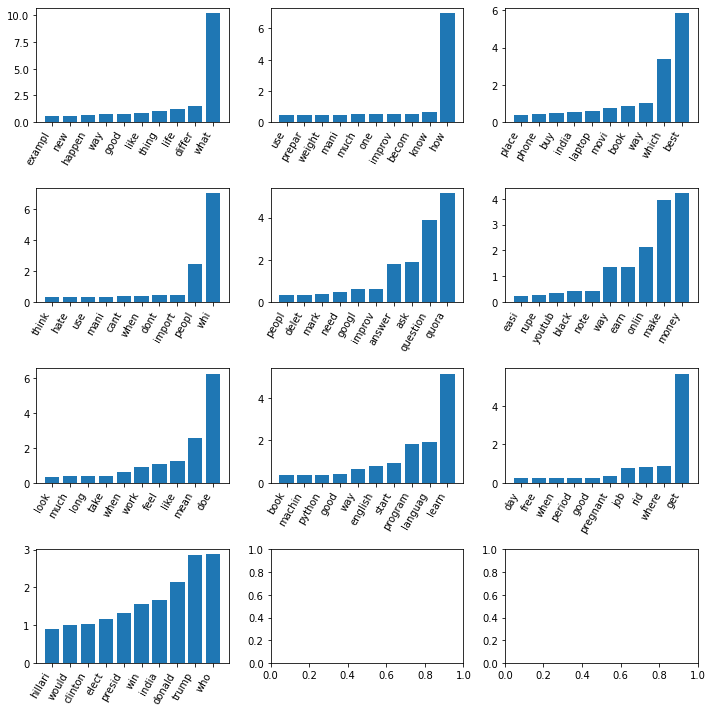

In [ ]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 10
fig, axes = plt.subplots(4,3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), model.components_):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

Topics:
1. WHAT. Question which starts with what is dominated in this category. i.e. what is the difference between..., what are the ways..., what happened to.., what is new...
2. HOW. Question which starts with how is dominated in this category. i.e. How much..., How many..., how to become..., how to know...
3. BEST. Best way to do anything. buying a new phone/laptop to best movie/book/ place to visit
4. WHICH. Question which starts with which is dominated in this category
5. Quora vs Google
6. MONEY. how to make online money and related queries
7. DOES. What does xyz mean..., How does xyz work...
8. LEARN. How to learn Python..., what is a good way to learn...
9. GET. How to get a job, How to get rid of...
10. WHO will win the presidential electio

In [ ]:
model = NMF(n_components=15,random_state=42)

In [ ]:
model.fit(X_train)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=15, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

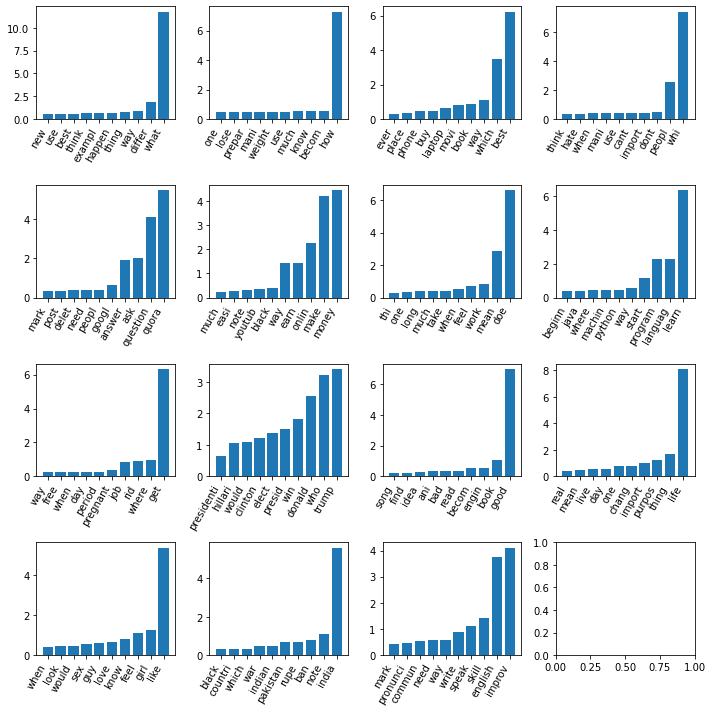

In [ ]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 15
fig, axes = plt.subplots(4,4, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), model.components_):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

Additional 5 Topics:
11. GOOD. i.e. Good idea to start..., good song, 
12. LIFE. i.e. purpose/meaning of life, 
13. LIKE i.e. what girl/guy likes...
14. India vs Pakistan, India note ban 
15. IMPROVE english

Given data can be classified in more catagories as every topics has meaningful insights.
